In [1]:
import pandas as pd
original_data=pd.read_csv('C:/Users/sarvesh/OneDrive/Desktop/Data Science/DATA CLEANING/CSV FILES/bengaluru_house_prices.csv')
original_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
data=original_data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [3]:
data.drop(['area_type','availability','balcony','society'],axis=1,inplace=True)
d1=data

In [4]:
d1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
d1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
d1['bath']=d1['bath'].fillna(d1.bath.median())

In [7]:
d1=d1.dropna()

In [8]:
d1.isnull().sum()
d2=d1

In [9]:
d2.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
d2['bhk']=d2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\sarvesh\AppData\Local\Temp\ipykernel_2256\329532188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['bhk']=d2['size'].apply(lambda x:int(x.split(' ')[0]))


In [11]:

d2['total_sqft']
d3=d2
d3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [12]:
def to_float(x):
    try:
         float(x)
    except:
         return False
    return True
d3[~d3['total_sqft'].apply(to_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [13]:
def size(x):
    if isinstance(x,float):
       return x
    token=x.split('-')
    if len(token)==2:
            result=(float(token[0])+float(token[1]))/2
            return float(result)
    try:
            float(x)
    except:
             None
    else:
        return float(x)
    
size('34.46Sq. Meter')

In [14]:
size('1520 - 1740')

1630.0

In [15]:
size(1630.0)

1630.0

In [16]:
d3['total_sqft']=d3['total_sqft'].apply(size)
d3['total_sqft'].unique()


C:\Users\sarvesh\AppData\Local\Temp\ipykernel_2256\2767523781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d3['total_sqft']=d3['total_sqft'].apply(size)


array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [17]:
len(d3['total_sqft'].unique())

1997

In [18]:
d4=d3.copy()
d4=d4.dropna()
d4.isna().sum()
isinstance(d4['total_sqft'],float)

False

In [19]:
d4['price_per_sqft'] = d4.apply(lambda row: row['price'] * 10000 / row['total_sqft'], axis=1)

In [20]:
d4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,668.983493
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,1111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,525.854514
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,1040.733632


In [21]:
len(d4.location.unique())

1298

In [22]:
d4.location=d4.location.apply(lambda x:x.strip())
location_stats=d4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats_others=location_stats[location_stats<=10]
location_stats_others

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [23]:
d5=d4.copy()
d5['location']=d5['location'].apply(lambda x: 'others' if x in location_stats_others else x)

In [24]:
len(d5['location'].unique())

241

In [25]:
d6=d5.copy()

In [26]:
d6.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [27]:
d7=d6[~(d6['total_sqft']/d6['bhk']<300)]

In [28]:
d7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,668.983493
13316,others,4 BHK,3600.0,5.0,400.00,4,1111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,525.854514
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,1040.733632


In [29]:
import numpy as np
def no_outlier_price(df):
    dataframe = pd.DataFrame()
    for key, data in df.groupby('location'):
        mean = np.mean(data.price_per_sqft)
        std = np.std(data.price_per_sqft)
        without_outlier = data[(data.price_per_sqft > (mean - std)) & (data.price_per_sqft <(mean + std))]
        dataframe=pd.concat([dataframe,without_outlier],ignore_index=True)
    return dataframe 

In [30]:
d8=no_outlier_price(d7)
d8.shape

(10288, 7)

In [31]:
d8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,1198.380567


In [32]:
from matplotlib import pyplot as plt
import matplotlib
def graph(dataframe,location):
    bhk2=dataframe[(dataframe['location']==location) & (dataframe['bhk']==2)]
    bhk3=dataframe[(dataframe['location']==location) &(dataframe['bhk']==3)]
    plt.figure(figsize=(10,7))
    plt.scatter(bhk2['total_sqft'],bhk2['price'],marker='*',color='red',label='2 bhk',s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='^',color='green',label='3 bhk',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    

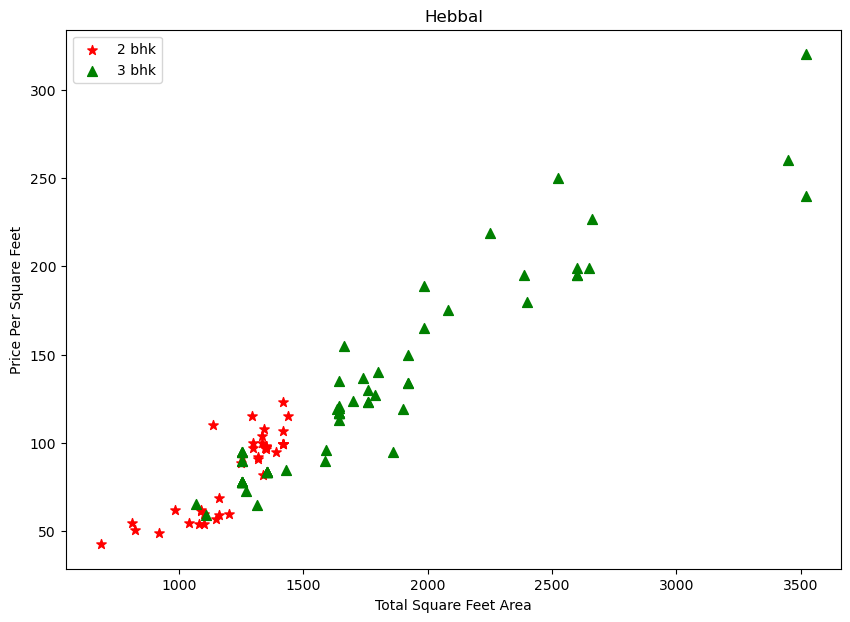

In [33]:
graph(d8,'Hebbal')

In [34]:
#let's remove outliers
def remove_outliers(dataframe):
    exclude_outliers=np.array([])
    for location,d1 in dataframe.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in dataframe.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in dataframe.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_outliers=np.append(exclude_outliers,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return dataframe.drop(exclude_outliers,axis='index')
d8=remove_outliers(d8)
d8.shape

(5380, 7)

In [35]:
d9=d8[d8.bath<d8.bhk+2]
d9.shape

(5312, 7)

In [36]:
d9.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,1198.380567


In [37]:
d9.drop(['size','price_per_sqft'],axis=1,inplace=True)

C:\Users\sarvesh\AppData\Local\Temp\ipykernel_2256\2424991644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d9.drop(['size','price_per_sqft'],axis=1,inplace=True)


In [38]:
final_data=d9.copy()
final_data.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [39]:
dummies=pd.get_dummies(final_data['location'])
final_data=pd.concat([final_data,dummies.drop('others',axis=1)],axis=1)
final_data.drop('location',axis=1,inplace=True)

In [40]:
final_data.shape

(5312, 222)

In [41]:
target=final_data['price']
features=final_data.drop('price',axis=1)

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
train_x,test_x,train_y,test_y=train_test_split(features,target,test_size=0.2)


In [43]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [44]:
def best_estimator(train_x,train_y):
    estimator={
    'linear_model':{
        'model':LinearRegression(),
        'params':{
            'fit_intercept':[True,False]
        }},
    'lassso':{
        'model':Lasso(),
        'params':
        {
            'alpha':[1,2],
            'selection':['random','cyclic']
        }
    },
    'tree':{
        'model':DecisionTreeRegressor(),
        'params':
        {
            'criterion':['absolute_error','friedman_mse'],
            'splitter':['best','random']
        }
    }
    }
    
    score=[]
    CV =ShuffleSplit (n_splits=5, test_size=0.2, random_state=0)
    for m,dic in estimator.items():
        model=GridSearchCV(dic['model'],dic['params'],cv=CV,return_train_score=False)
        model.fit(train_x,train_y)
        score.append({
            'model':m,
            'score':np.sqrt(model.best_score_),
            'params':model.best_params_
        })
    return pd.DataFrame(score)

In [45]:
best_estimator(train_x,train_y)

C:\Users\sarvesh\AppData\Local\Temp\ipykernel_2256\2423640255.py:33: RuntimeWarning: invalid value encountered in sqrt
  'score':np.sqrt(model.best_score_),


,model,score,params
0,linear_model,NaN,{'fit_intercept': False}
1,lassso,0.857318,"{'alpha': 1, 'selection': 'random'}"
2,tree,0.874213,"{'criterion': 'absolute_error', 'splitter': 'b..."


In [100]:
from sklearn import linear_model
model=linear_model.Lasso(alpha=1,selection='random')
model.fit(train_x,train_y)
model.score(test_x,test_y)

0.6992507212011767

In [102]:
import pickle
with open('real_estate_model.pickle','wb') as f:
    pickle.dump(model,f)

In [128]:
import json
column={'column_name':[col.lower() for col in train_x.columns]}
with open('real_estate_column.json','w')as f:
    f.write(json.dumps(column))